In [12]:
#Importing the different library packages required for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
#Read the dataset file into Pandas dataframe
cust_df = pd.read_csv("Customer-Churn-Records.csv")

In [3]:
cust_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [4]:
#Informtion of imported dataset
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
#Summary statistics of the data 
cust_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [6]:
#Identifying any missing entries
cust_df.loc[cust_df.isna().any(axis="columns")]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned


In [7]:
#Identify for any duplicated entries
cust_df.loc[cust_df.duplicated(keep=False)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned


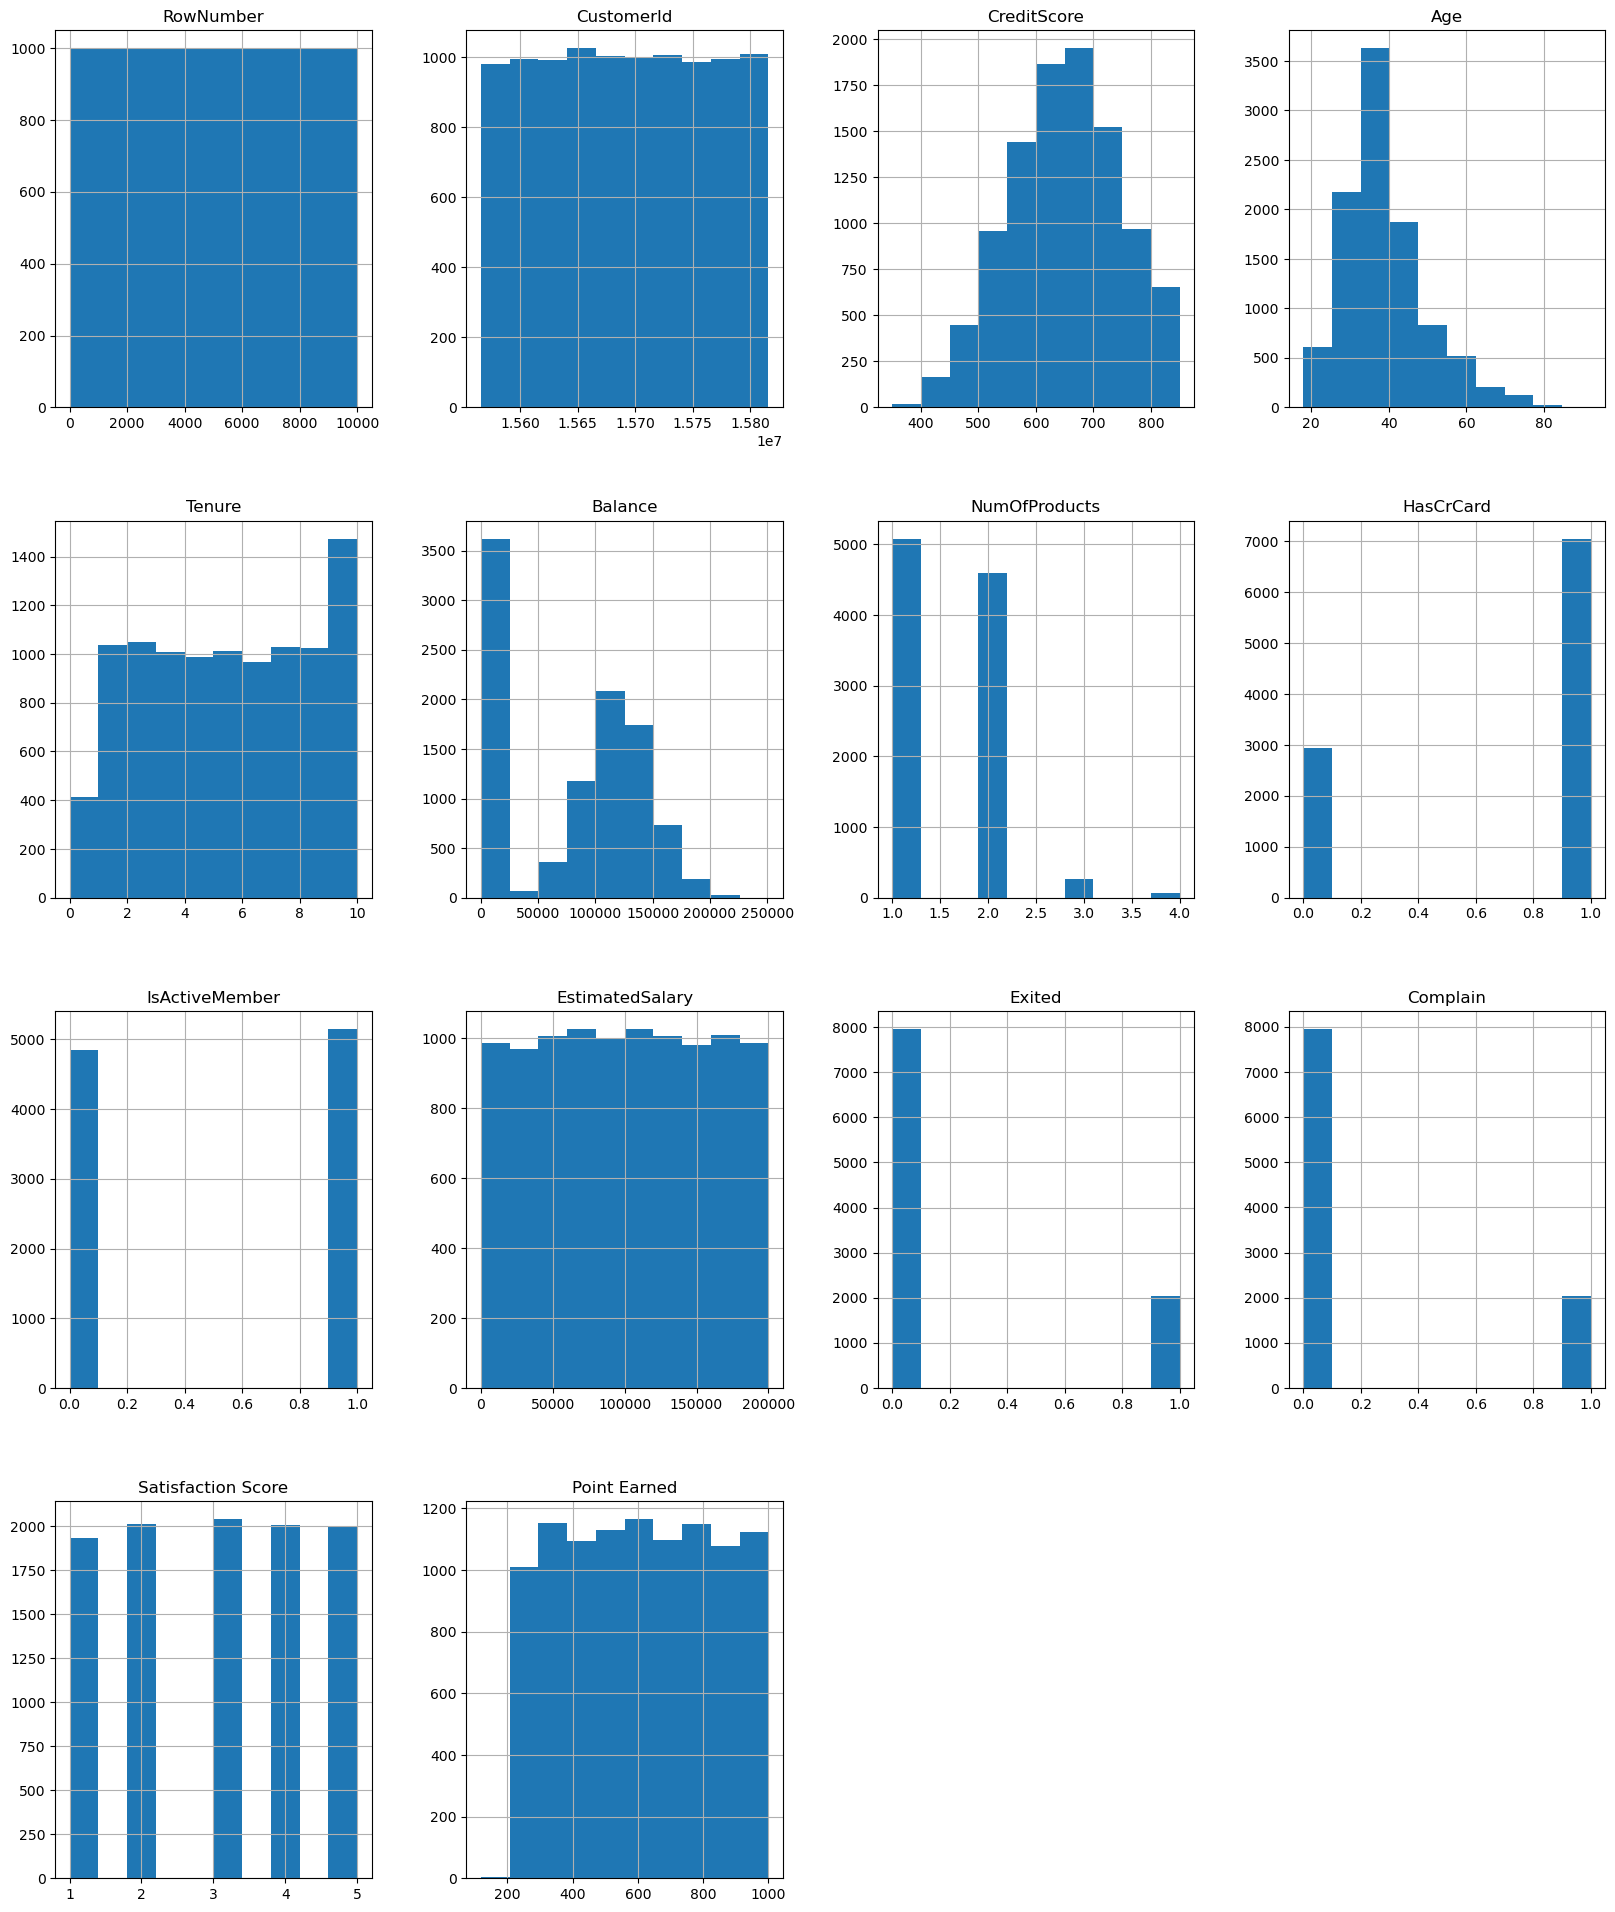

In [8]:
#Histogram plot of numerical data members
cust_df.hist(figsize=(20, 24))
plt.show()

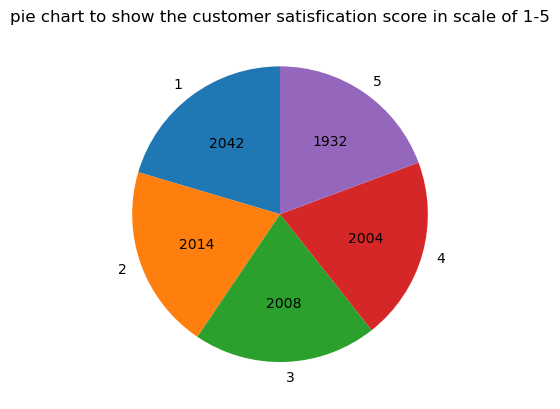

In [9]:
#Pie chart displaying the customer satisfaction scores
pievalues = (cust_df["Satisfaction Score"].value_counts()).to_numpy()
plt.pie(cust_df["Satisfaction Score"].value_counts(), labels=["1", "2", "3", "4", "5"], autopct= lambda z: '{:.0f}'.format(z*pievalues.sum()/100), startangle=90)
plt.title("pie chart to show the customer satisfication score in scale of 1-5");

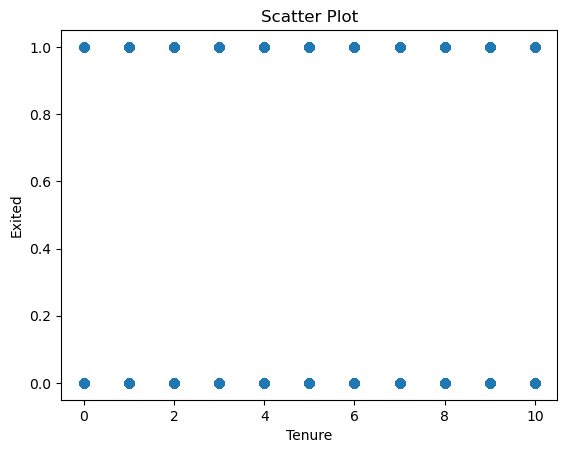

In [10]:
#Scatter plot showing relation between Tenure and Exited data members
plt.scatter(cust_df["Tenure"], cust_df["Exited"])
plt.xlabel("Tenure")
plt.ylabel("Exited")
plt.title("Scatter Plot");

In [13]:
#Using Label Encoding for transforming the categorial data members to numerical
le = LabelEncoder()
cust_df['Gender'] = le.fit_transform(cust_df['Gender'])
cust_df['Card Type'] = le.fit_transform(cust_df['Card Type'])
cust_df['Geography'] = le.fit_transform(cust_df['Geography'])

print(cust_df)

      RowNumber  CustomerId    Surname  CreditScore  Geography  Gender  Age  \
0             1    15634602   Hargrave          619          0       0   42   
1             2    15647311       Hill          608          2       0   41   
2             3    15619304       Onio          502          0       0   42   
3             4    15701354       Boni          699          0       0   39   
4             5    15737888   Mitchell          850          2       0   43   
...         ...         ...        ...          ...        ...     ...  ...   
9995       9996    15606229   Obijiaku          771          0       1   39   
9996       9997    15569892  Johnstone          516          0       1   35   
9997       9998    15584532        Liu          709          0       0   36   
9998       9999    15682355  Sabbatini          772          1       1   42   
9999      10000    15628319     Walker          792          0       0   28   

      Tenure    Balance  NumOfProducts  HasCrCard  

In [14]:
#Creating data frame of numerical data members for correlation analysis
cust_sub_df = cust_df.loc[:, cust_df.columns.drop(['RowNumber','CustomerId','Surname'])]
correlation_table = cust_sub_df.corr()
print(correlation_table)

                    CreditScore  Geography    Gender       Age    Tenure  \
CreditScore            1.000000   0.007888 -0.002857 -0.003965  0.000842   
Geography              0.007888   1.000000  0.004719  0.022812  0.003739   
Gender                -0.002857   0.004719  1.000000 -0.027544  0.014733   
Age                   -0.003965   0.022812 -0.027544  1.000000 -0.009997   
Tenure                 0.000842   0.003739  0.014733 -0.009997  1.000000   
Balance                0.006268   0.069408  0.012087  0.028308 -0.012254   
NumOfProducts          0.012238   0.003972 -0.021859 -0.030680  0.013444   
HasCrCard             -0.005458  -0.008523  0.005766 -0.011721  0.022583   
IsActiveMember         0.025651   0.006724  0.022544  0.085472 -0.028362   
EstimatedSalary       -0.001384  -0.001369 -0.008112 -0.007201  0.007784   
Exited                -0.026771   0.035712 -0.106267  0.285296 -0.013656   
Complain              -0.027048   0.035830 -0.106287  0.283530 -0.013047   
Satisfaction

<Axes: >

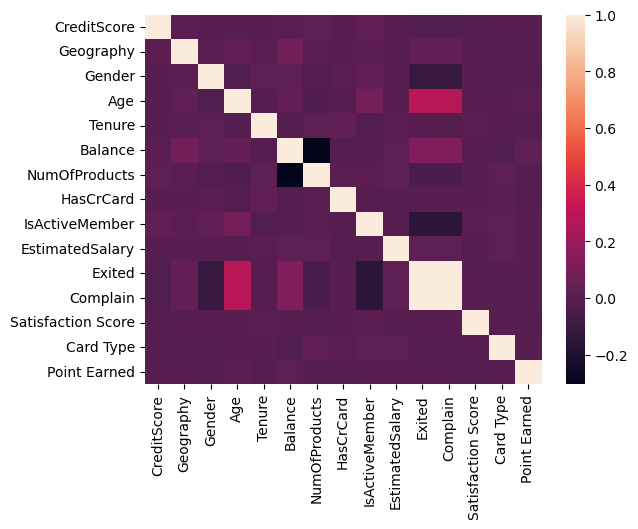

In [15]:
#Heatmap of correlation table entries
sns.heatmap(correlation_table)

In [16]:
#Creation of feature dataframe of required data members for predictive analytics in form of classification
X = cust_df.drop(['Exited', 'Surname', 'RowNumber','CustomerId','Complain'], axis=1) 
y = cust_df['Exited']

In [17]:
#Dataset partition in form of Training set of 60% and Test set of 40%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) 

In [18]:
# Create a logistic regression model on the dataset
model_lr = LogisticRegression()

# Train the model on the partition
model_lr.fit(X_train, y_train)

# Make predictions on the partition
y_pred = model_lr.predict(X_test)

# Calculate the accuracy of the model prediction
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Logistic Regression Model Accuracy:", accuracy) 

Logistic Regression Model Accuracy: 0.79375


In [19]:
# Create a decision tree model on the dataset
model_dt = DecisionTreeClassifier()

# Train the model on the partition
model_dt.fit(X_train, y_train)

# Make predictions on the partition
y_pred = model_dt.predict(X_test)

# Calculate the accuracy of the model prediction
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Decision Tree Model Accuracy:", accuracy) 

Decision Tree Model Accuracy: 0.782


In [20]:
# Create a K Nearest Neigbhors model on the dataset
model_kn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the partition
model_kn.fit(X_train, y_train)

# Make predictions on the partition
y_pred = model_kn.predict(X_test)

# Calculate the accuracy of the model prediction
accuracy = metrics.accuracy_score(y_test, y_pred)
print("K Nearest Neighbhors Model Accuracy:", accuracy)

K Nearest Neighbhors Model Accuracy: 0.7625


In [21]:
# Create a Gaussian Naive Bayes model on the dataset
model_gnb = GaussianNB()

# Train the model on the partition
model_gnb.fit(X_train, y_train)

# Make predictions on the partition
y_pred = model_gnb.predict(X_test)

# Calculate the accuracy of the model prediction
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Gaussian Naive Bayes Model Accuracy:", accuracy)

Gaussian Naive Bayes Model Accuracy: 0.787


In [22]:
# Create an Support Vector Machine model on the dataset
model_svn = SVC()

# Train the model on the partition
model_svn.fit(X_train, y_train)

# Make predictions on the partition
y_pred = model_svn.predict(X_test)

# Calculate the accuracy of the model prediction
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Support Vector Machine Model Accuracy:", accuracy)

Support Vector Machine Model Accuracy: 0.7975


In [23]:
# Create a new decision tree model with changes to hyperparameters of using 'entropy', 'max depth' on the dataset
model_dt2 = DecisionTreeClassifier(criterion="entropy", max_depth=3) 

# Train the model on the partition
model_dt2.fit(X_train, y_train)

# Make predictions on the partition
y_pred = model_dt2.predict(X_test)

# Calculate the accuracy of the model prediction
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Decision Tree Model with entropy, max depth parameters -  Accuracy:", accuracy) 

Decision Tree Model with entropy, max depth parameters -  Accuracy: 0.82


In [24]:
#Identification of significant parameters, feature importance from the best model -
#Decision Tree Model with entropy, max depth parameters
f_values, p_values = f_classif(X, y)
importances = model_dt2.feature_importances_
feature_names = X.columns

for name, importance, fvalue, pvalue in zip(feature_names, importances, f_values, p_values):
    print(f"{name}: {importance}, {fvalue}, {pvalue}")

CreditScore: 0.0, 7.170810283394508, 0.007422037242886283
Geography: 0.0, 12.767559219067742, 0.00035434269861258364
Gender: 0.0, 114.19270503763188, 1.6434694587949248e-26
Age: 0.4512156432799047, 885.88360917193, 1.3467162476249464e-186
Tenure: 0.0, 1.8647832787680527, 0.17210447548799793
Balance: 0.00793846035454768, 142.58145617258543, 1.2092076077165623e-32
NumOfProducts: 0.5408458963655475, 22.71466118143496, 1.9057769904620855e-06
HasCrCard: 0.0, 0.4865820113584513, 0.48547218607853926
IsActiveMember: 0.0, 250.5470929581478, 9.355109807139997e-56
EstimatedSalary: 0.0, 1.55986237528169, 0.21171461351484844
Satisfaction Score: 0.0, 0.3420745254969133, 0.5586474054220171
Card Type: 0.0, 1.1794102222263496, 0.2775022784004196
Point Earned: 0.0, 0.21416161211191745, 0.6435350184306738


In [25]:
#Generate classification report from the best model - Decision Tree Model with entropy, max depth parameters
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      3190
           1       0.83      0.14      0.24       810

    accuracy                           0.82      4000
   macro avg       0.82      0.57      0.57      4000
weighted avg       0.82      0.82      0.76      4000



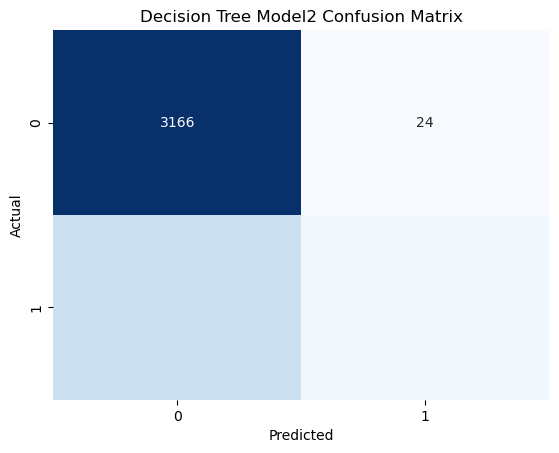

In [32]:
#Generate visual confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Model2 Confusion Matrix");

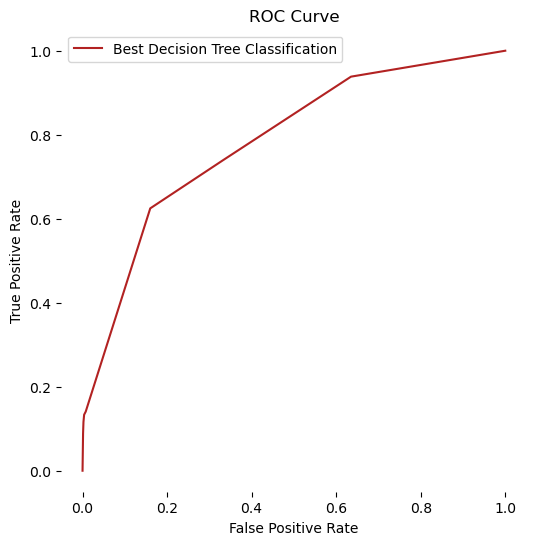

In [33]:
# Generate ROC Curve plot
y_predict_probab = model_dt2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_predict_probab)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Best Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();